In [64]:
# Plotting landmark labels

# Dylan Geldehuys

#import all modules
from PIL import Image
import pandas as pd
import sys
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import asarray

main = "/home/19065299/CV_DYLAN/tetseP/Dylan/"#"/home/dylan/Projects/Tetse_proj/Dylan/"
data_2 = "/home/19065299/CV_DYLAN/tetseP/Dylan/2/"
imageWithLandmark = "/home/19065299/CV_DYLAN/tetseP/Dylan/2/imageWithLandmark/"
C_data =  "/home/19065299/CV_DYLAN/tetseP/Dylan/2/C_data/"
imageWithLandmark_final = "/home/19065299/CV_DYLAN/tetseP/Dylan/2/imageWithLandmark_final/"
Result_figs = "/home/19065299/CV_DYLAN/tetseP/Dylan/2/Result_figs/"


In [65]:

# Read in labeled data from text file and create indexable dataframe

df = pd.read_fwf(data_2 + 'refined_data.txt',header=None)
which = lambda lst:list(np.where(lst)[0])
new = df.iloc[:,4].str.split(" ", n = 23, expand = True)
df= df.drop(labels=4, axis=1)
result = pd.concat([df, new], axis=1, sort=False)
        # column numbers were messed up, make them go according to range
result.columns = range(result.shape[1])
result.reset_index(inplace=True, drop=True)

text_data = result.copy() 
text_data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A002,-,20170126_195145.jpg,402.523252,301.503763583,558.891884541,320.74913377,1117.00761996,551.69357601,1203.6117858,...,722.477531128,700.845194957,647.901721655,467.495081443,616.627995101,426.598669797,337.570127394,404.947628337,260.588646648,842.779800084
1,A002,-,20170126_195709.jpg,267.805660,291.88107849,977.478686102,628.675056757,1042.43181048,691.222509864,1114.60194868,...,611.816652555,546.882233463,590.165611095,501.17447927,544.457856901,390.513600696,359.221168854,443.43836871,246.154619008,609.42968657
2,A002,-,20170126_200020.jpg,566.108898,323.154805043,1126.63030505,561.316261103,1203.6117858,635.892070577,1222.85715598,...,655.118735475,460.278067623,626.250680195,419.381655977,515.589801621,388.107929423,361.626840128,400.13628579,282.239688108,905.327253191
3,A002,-,20170126_200756.jpg,325.541771,356.83420287,556.486213268,448.249711257,938.987945728,652.73176949,1013.5637552,...,633.467694015,739.33593533,599.788296188,570.938946197,582.948597275,532.448205823,390.494895408,498.768807997,303.890729568,364.05121669
4,A002,-,20170126_201013.jpg,347.192812,327.96614759,616.627995101,412.164642157,1119.41329123,633.486399304,1191.58342943,...,708.043503488,546.882233463,679.175448208,508.39149309,428.985635781,477.117766537,354.409826308,484.334780357,344.787141214,893.298896824
5,A002,-,20170126_201436.jpg,255.777304,277.44705085,570.920240908,359.239874143,1133.84731887,566.12760365,1215.64014216,...,744.128572588,729.713250237,674.364105661,513.202835637,645.496050381,465.08941017,371.249525221,443.43836871,265.399989194,248.57899557
6,A002,-,20170126_201914.jpg,258.182975,224.522282836,582.948597275,311.126448676,1129.03597632,532.448205823,1220.45148471,...,674.364105661,472.30642399,635.873365288,419.381655977,366.438182674,390.513600696,258.182975374,438.627026163,467.476376154,806.694730984
7,A002,-,20170126_202146.jpg,544.457857,337.588832683,917.336904268,465.08941017,1054.46016685,542.070890917,1131.4416476,...,691.203804575,681.59982477,623.845008921,481.929109083,604.599638735,436.22135489,361.626840128,407.35329961,270.211331741,847.59114263
8,A002,-,20170126_202415.jpg,190.824180,376.079573056,489.127417615,438.627026163,1040.02613921,585.372973837,1126.63030505,...,592.571282368,566.12760365,563.703227088,525.231192003,303.890729568,532.448205823,207.663878634,575.750288743,178.795823354,301.503763583
9,A002,-,20170126_202824.jpg,517.995473,325.560476316,1064.08285194,515.60850691,1136.25299014,566.12760365,1165.12104542,...,619.033666375,472.30642399,578.137254728,426.598669797,217.286563727,258.201680663,323.136099754,409.758970883,224.503577547,886.081883004


In [9]:
text_data.shape[0]

464

In [49]:
#This code block creates all the images plotted with there landmark 
#and saves it as a png in the folder imageWithLandmark

for i in range(text_data.shape[0]):
    im_name = " ".join(text_data.loc[i,[0,1,2]])
    im = Image.open(data_2 + im_name)
    x,y = float(text_data.iloc[i,15]),float(text_data.iloc[i,16])
    plt.imshow(im)
    plt.plot(x,y,'o')
    plt.savefig(imageWithLandmark + im_name.replace('jpg','png'))
    plt.close()
    #Image.open(imageWithLandmark + im_name.replace('jpg','png')).save(im_name,'JPEG')
    

  


In [66]:
#This code block plots all the landmarks for the refines_data.txt on a single image

im_name = " ".join(text_data.loc[0,[0,1,2]])
im = Image.open(data_2 + im_name)
plt.imshow(im)
for i in range(text_data.shape[0]):
    x,y = float(text_data.iloc[i,15]),float(text_data.iloc[i,16])
    plt.plot(x,y,'o')

plt.savefig(Result_figs + "Uncurated_landmarkPlots.png")
plt.show()

In [71]:
# open curated data 
text_data2 = pd.read_csv(main + 'new_textFile.csv')
text_data2.drop(text_data2.columns[[0]], axis=1, inplace=True)



(185, 25)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A002,-,20170127_042138.jpg,279.834017,210.088255,587.759940,311.126449,1172.338059,568.533275,1261.347896,...,760.968272,710.467880,698.420818,472.306424,676.769777,426.598670,337.570127,383.296587,275.022674,691.222510
1,A002,-,20170126_232303.jpg,344.787141,198.059899,631.062023,318.343462,1131.441648,604.618344,1203.611786,...,744.128573,703.250866,688.798133,467.495081,683.986791,429.004341,397.711909,371.268231,327.947442,397.730615
2,A002,-,20170127_051225.jpg,287.051031,337.588833,534.835172,383.296587,1015.969426,542.070891,1100.167921,...,691.203805,688.816839,645.496050,520.419849,619.033666,477.117767,339.975799,472.306424,291.862373,679.194153
3,A002,-,20170127_014159.jpg,284.645359,164.380501,578.137255,270.230037,1145.875675,563.721932,1213.234471,...,727.288874,686.411167,679.175448,453.061054,645.496050,390.513601,337.570127,342.400175,258.182975,101.833048
4,A002,-,20170127_101705.jpg,327.947442,202.871241,616.627995,313.532120,1179.555073,602.212673,1246.913869,...,751.345586,708.062209,717.666189,472.306424,696.015147,426.598670,368.843854,364.051217,306.296401,94.616034
5,A002,-,20170126_235805.jpg,161.956124,419.381656,404.928923,460.278068,876.440493,587.778645,972.667344,...,578.137255,732.118922,498.750103,570.938946,472.287719,551.693576,255.777304,551.693576,176.390152,253.390338
6,A002,-,20170126_213714.jpg,198.041194,296.692421,431.391307,380.890916,835.544081,539.665220,907.714219,...,530.023829,647.920427,493.938760,489.146123,474.693390,443.438369,267.805660,431.410012,186.012837,404.947628
7,A002,-,20170127_030333.jpg,311.107743,282.258393,578.137255,371.268231,1143.470004,602.212673,1234.885512,...,756.156929,727.307579,688.798133,518.014178,669.552763,474.712095,361.626840,438.627026,303.890730,301.503764
8,A002,-,20170127_024926.jpg,265.399989,159.569158,551.674871,234.144968,1131.441648,457.872396,1213.234471,...,739.317230,602.212673,652.713064,380.890916,638.279037,337.588833,313.513415,315.937791,262.994318,864.430842
9,A002,-,20170127_094601.jpg,352.004155,24.851567,628.656351,135.512446,1165.121045,414.570313,1237.291184,...,772.996628,518.014178,722.477531,287.069736,691.203805,253.390338,395.306238,186.031542,327.947442,388.107929


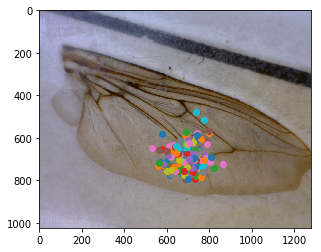

In [73]:
im_name = " ".join(text_data2.iloc[0,[0,1,2]])
im = Image.open(C_data + im_name)
plt.imshow(im)

for i in range(text_data2.shape[0]):
    x,y = float(text_data2.iloc[i,15]),float(text_data2.iloc[i,16])
    plt.plot(x,y,'o')
plt.savefig(Result_figs + 'Curated_landmarkPlots')
plt.show()

In [74]:
# creates imageWithLandmark_final
'''
# THis code block generates all the curated images witht there landmark plot
for i in range(text_data2.shape[0]):
    im_name = " ".join(text_data2.iloc[i,[0,1,2]])
    im = Image.open(C_data + im_name)
    x,y = float(text_data2.iloc[i,15]),float(text_data2.iloc[i,16])
    plt.imshow(im)
    plt.plot(x,y,'o')
    plt.savefig(imageWithLandmark_final + im_name.replace('jpg','png'))
    plt.close()
'''